# KNN Classifier: Predicting Iris Species with Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.shape

(150, 5)

### Data Cleaning

In [5]:
iris.isna().sum()
#no missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris['species'].value_counts()
#3 classes are there

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
iris.duplicated().sum()

1

In [8]:
duplicate_values = iris[iris.duplicated(keep=False)]
duplicate_values

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [9]:
iris=iris.drop_duplicates()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
iris['species']=labelencoder.fit_transform(iris['species'])
iris

C:\Users\admin\AppData\Local\Temp\ipykernel_17084\4119614631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['species']=labelencoder.fit_transform(iris['species'])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
iris.species.value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

In [12]:
# Retrieve the original categories
original_categories = labelencoder.inverse_transform(range(len(labelencoder.classes_)))

# Display the encoded values along with their original categories
for encoded_value, category in zip(range(len(labelencoder.classes_)), original_categories):
    print(f"{encoded_value}: {category}")

0: setosa
1: versicolor
2: virginica


## Model Building

### KNN

In [13]:
#splitting features as x and y
y=iris.species
X=iris.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [15]:
# from sklearn.preprocessing import StandardScaler
# # Standardize features by removing the mean and scaling to unit variance
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [17]:
# Calculate error rate for different values of K
error_rate = []
k_values = range(1, 40)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [18]:
# # Cross-validation with KNN using distance-based weights
# k_values = range(1, 40)
# cv_scores = []
# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
#     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())

In [19]:
# # Cross-validation with scaled features
# k_values = range(1, 40)
# cv_scores = []
# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
#     scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())

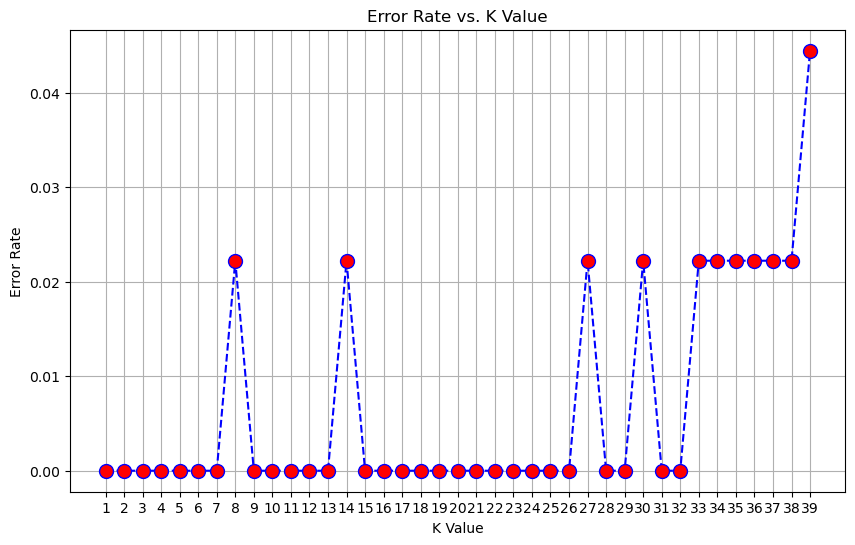

In [20]:
# Plotting error rate vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rate, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()
    

In [21]:
# # Plotting cross-validation accuracy vs. K
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, cv_scores, color='blue', linestyle='dashed', 
#          marker='o', markerfacecolor='red', markersize=10)
# plt.title('Cross-Validation Accuracy vs. K Value')
# plt.xlabel('K Value')
# plt.ylabel('Cross-Validation Accuracy')
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

In [22]:
# Choosing the K value with minimum error rate
min_error = min(error_rate)
min_error_index = error_rate.index(min_error) + 1  # Adding 1 to get the actual index
print("Minimum error rate:", min_error, "at K =", min_error_index)


Minimum error rate: 0.0 at K = 1


In [23]:
# # Choosing the K value with maximum cross-validation accuracy
# max_cv_accuracy = max(cv_scores)
# max_cv_accuracy_index = cv_scores.index(max_cv_accuracy) + 1  # Adding 1 to get the actual index
# print("Maximum cross-validation accuracy:", max_cv_accuracy, "at K =", max_cv_accuracy_index)


In [24]:
# Using the K value with minimum error rate to train the final model
final_k = 5
final_knn = KNeighborsClassifier(n_neighbors=final_k)
final_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# # Using the K value with maximum cross-validation accuracy to train the final model
# final_k = max_cv_accuracy_index
# final_knn = KNeighborsClassifier(n_neighbors=final_k, weights='distance')
# final_knn.fit(X_train, y_train)

In [26]:
# Predictions on test data & train data using the final model
y_test_pred = final_knn.predict(X_test)
y_train_pred = final_knn.predict(X_train)



In [27]:
# Model accuracy on test and train data
test_accuracy = np.mean(y_test_pred == y_test)
train_accuracy = np.mean(y_train_pred == y_train)
print("Accuracy on test data using K =", final_k, ":", test_accuracy)
print("Accuracy on train data using K =", final_k, ":", train_accuracy)

Accuracy on test data using K = 5 : 1.0
Accuracy on train data using K = 5 : 0.9519230769230769


In this scenario, the KNN classification model with k=5 achieved a near-perfect accuracy of 1.0 on the test data, while maintaining a high accuracy of approximately 95.19% on the training data.

This indicates that the model is effectively capturing the underlying patterns in the data and generalizing well to unseen instances. However, it's crucial to note that achieving perfect accuracy on the test data could potentially raise questions about the complexity of the model and the possibility of overfitting.

Despite the high performance, further investigation into the robustness of the model and its generalization to unseen data beyond the current dataset may be warranted. This could include exploring additional evaluation metrics, such as precision, recall, or conducting cross-validation, to ensure the reliability and effectiveness of the model in real-world applications.

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [29]:
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

In [30]:
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_conf_matrix = confusion_matrix(y_train, y_train_pred)


In [31]:
print("Test Precision:", test_precision)
print("Train Precision:", train_precision)
print("Test Recall:", test_recall)
print("Train Recall:", train_recall)
print("Test F1 Score:", test_f1)
print("Train F1 Score:", train_f1)
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Train Confusion Matrix:")
print(train_conf_matrix)

Test Precision: 1.0
Train Precision: 0.9521685146685146
Test Recall: 1.0
Train Recall: 0.9519230769230769
Test F1 Score: 1.0
Train F1 Score: 0.9519230769230769
Test Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Train Confusion Matrix:
[[31  0  0]
 [ 0 34  3]
 [ 0  2 34]]


These results indicate that the model performs exceptionally well on both the test and train data, achieving perfect precision, recall, and F1 score on the test data. The confusion matrices show that the model makes very few misclassifications, with only a few instances where the predicted class differs from the true class.